First we will import necessary libraries and import our dataset using the pandas read_csv() function

In [1]:
# importing necessary files
import numpy as np
import pandas as pd
import sklearn 
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/HR_comma_sep.csv') # importing data

print(data.head()) # checks first 5 rows
print(data.info()) # gives info on the dataset

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

Exploratory Data Analysis (Visualization) : will graph the probability of a person to leave depending on the independant variables to see any correlations.

In [2]:
print(data.corr()) # finds correlations in the dataframe

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

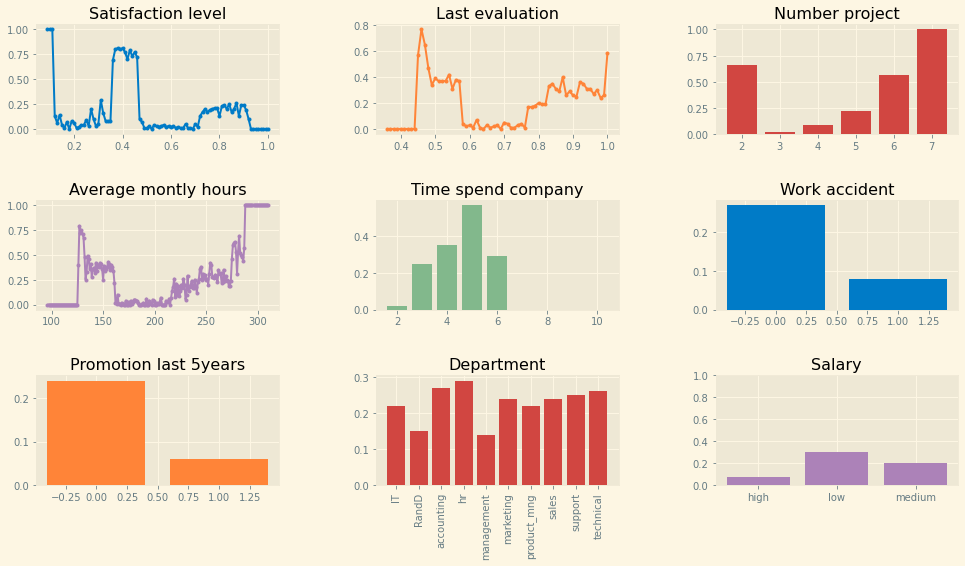

In [3]:


def percentVal (column_x): # gets the percentage of people who have left for each unique value of independant variable x
  unq_x = np.unique(data[f"{column_x}"])
  avg_y, j = np.ndarray(unq_x.shape), 0
  for i in unq_x:
    x_vals = data.loc[data[f"{column_x}"]==i]
    avg_y[j] = np.sum(x_vals["left"])/len(x_vals)
    j+=1
  return unq_x, np.round(avg_y,2)
       
# design

plt.style.use('Solarize_Light2')
fig,a = plt.subplots(3,3, figsize=(16,8))
k, arrX = 0, data.columns
arrX = np.delete(arrX, 6)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
colors = ['#007bc7','#ff8438', '#d14641' , '#ac82b8' ,'#82b88c' ]

# plots all graphs

for i in range(3):
  for j in range(3):
    x,y = percentVal(arrX[k])
    color = colors[k%len(colors)]
    if(arrX[k] == "satisfaction_level" or arrX[k] == "last_evaluation" or arrX[k] == "average_montly_hours"): 
      a[i][j].plot(x,y,color=f"{color}")      
      a[i][j].scatter(x,y,color=f"{color}",marker=".")
    else:
      a[i][j].bar(x,y,color=f"{color}")
      plt.ylim([0,1])
    if(arrX[k] == "Department"):
      a[i][j].set_xticklabels(x,rotation = 90)
    a[i][j].set_title(arrX[k].replace("_", " ").capitalize(), color="black")
    k+=1


step 2: Finding corolations,

All data has corolation except for department because there is no specific pattern. This is classified as redundant data.





step 3: Removing redundant data and cleaning dataset,

Now we have found our redundant data we finally must remove it and clean our final dataset we will use for our model



In [4]:
# cleaning data and removing redundant data

# removing Department
x = data[["satisfaction_level",  "last_evaluation",  "number_project",  "average_montly_hours", "time_spend_company",  "Work_accident",  "left"  , "promotion_last_5years", "salary" ]]

# using label encoder to change salary values to integers
x.replace(["low","medium","high"],[1,2,3], inplace=True)
# le = preprocessing.LabelEncoder()
# le.fit(x["salary"])
# x["salary"] = le.transform(x["salary"])

y = x["left"]
x = x[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years", "salary" ]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Now we can strat with splitting the dataset. 70% will be on training and the other 30% will be on testing.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) 

We have chosen 5 machine learning algorithms for our project and now we will compare and see what fits our demand

1.   K-Nearest Neighbour
2.   Naive Bayes algorithm
1.   Random forest
2.   Support vector machine
1.   Logistic regression


In [6]:
### importing all machine learning algorithms 

from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm #Support Vector Machine
from sklearn.linear_model import LogisticRegression #Logistic Regression



# importing accuracy_score and precision_score to check the accuracy and precision of our models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
accuracyScores, precisionScores = [] , []   # created 2 lists to compile our accuracy and precision results


# will multiply all accuracy scores and precisiion scores with 100 to get their percentage values 
# will also round each percentage value to the nearest 2nd decimal place

# K-Nearest Neighbour (KNN) 

clf_KNN = KNeighborsClassifier(n_neighbors=7) 
clf_KNN.fit(x_train, y_train)
y_pred = clf_KNN.predict(x_test)
accuracyScores.append(round(accuracy_score(y_test, y_pred)*100,2))
precisionScores.append(round(precision_score(y_test, y_pred)*100,2))

# Naive Bayes 

clf_NB = GaussianNB()
clf_NB.fit(x_train, y_train)
y_pred = clf_NB.predict(x_test)
accuracyScores.append(round(accuracy_score(y_test, y_pred)*100,2))
precisionScores.append(round(precision_score(y_test, y_pred)*100,2))

# Random Forest

clf_RF = RandomForestClassifier(max_depth=7, random_state=0)
clf_RF.fit(x_train, y_train)
y_pred = clf_RF.predict(x_test)
accuracyScores.append(round(accuracy_score(y_test, y_pred)*100,2))
precisionScores.append(round(precision_score(y_test, y_pred)*100,2))

# Support Vector Machine (SVM)

clf_SVM = svm.SVC()
clf_SVM.fit(x_train, y_train)
y_pred = clf_SVM.predict(x_test)
accuracyScores.append(round(accuracy_score(y_test, y_pred)*100,2))
precisionScores.append(round(precision_score(y_test, y_pred)*100,2))

# Logistic Regression

clf_LR = LogisticRegression(random_state = 0)  
clf_LR.fit(x_train, y_train)
y_pred = clf_LR.predict(x_test)
accuracyScores.append(round(accuracy_score(y_test, y_pred)*100,2))
precisionScores.append(round(precision_score(y_test, y_pred)*100,2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Now we will create a bar graph which shows both the accuracy and precision of the algorithms to see which algorithm is most useful to us

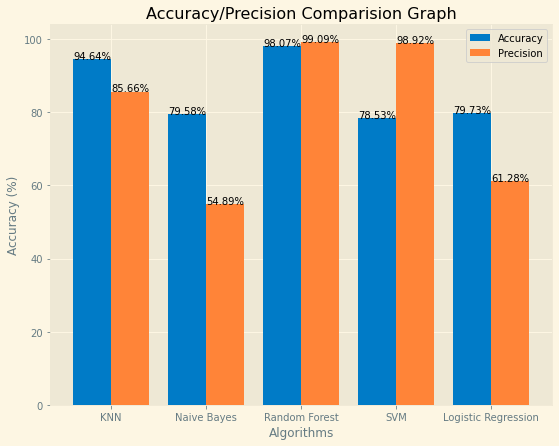

In [7]:
models = ["KNN", "Naive Bayes", "Random Forest", "SVM", "Logistic Regression"] # the labels of the x axis for our bar graph
X_axis = np.arange(len(models)) # X_axis = [0, 1, 2, 3, 4]    used for positioning the bars


plt.figure(figsize=(9,7)) # set the size of our figure


# creating 2 seperate bar graphs positioned next to eachother for accuracy and precision

plt.bar(X_axis - 0.2, accuracyScores,0.4,label="Accuracy",color='#007bc7')
plt.bar(X_axis + 0.2, precisionScores,0.4,label="Precision",color='#ff8438')


# places the value of the bars on top of them

for i in range(len(models)): 
  plt.text( i - 0.2, accuracyScores[i], f"{accuracyScores[i]}%", ha="center") 
  plt.text( i + 0.2, precisionScores[i], f"{precisionScores[i]}%", ha="center")
  

plt.xticks(X_axis, models) # adds the names of the algorithms on the x axis
plt.xlabel("Algorithms")   
plt.ylabel("Accuracy (%)")   
plt.title("Accuracy/Precision Comparision Graph")
plt.legend()
plt.show()

As for our project we are heavily focused upon both accuracy and precision as it allows our model to properly predict the likelihood of an employee to leave and for employee retention. Therefore, due to having the highest accuracy and precision of the selected algorithms, Random Forest algorithm will be our algorithm of choice 


Now we can use the model to create our own predictions using a questionaire-based aproach to collect our data from the employees.

In [10]:

#   Fields / columns of dataset
  
#   1 -  Satisfactory Levels
#   2 -  Last Evaluation
#   3 -  Number Project
#   4 -  Average Monthly Hour
#   5 -  Time Spent
#   6 -  Work accidents
#   7 -  Promotion last 5 years
#   8 -  Salary


print("""                                                                          
█▀▀ █▀▄▀█ █▀█ █░░ █▀█ █▄█ █▀▀ █▀▀   █▀█ █░█ █▀▀ █▀ ▀█▀ █ █▀█ █▄░█ ▄▀█ █ █▀█ █▀▀
██▄ █░▀░█ █▀▀ █▄▄ █▄█ ░█░ ██▄ ██▄   ▀▀█ █▄█ ██▄ ▄█ ░█░ █ █▄█ █░▀█ █▀█ █ █▀▄ ██▄
""")

inp = np.empty((1,8))

# Satisfactory Levels (RANGE 0 TO 1, hence divided by 10)
inp[0][0] = float(input("How satisfied are you with your job right now? (0-10) "))/10 

# Last Evaluation (RANGE 0 TO 1, hence divided by 10)
inp[0][1] = float(input("How satisfied were you in the previous month? (0-10) "))/10 

# Number Project
inp[0][2] = input("How many projects have you done? ")

# Time spent
inp[0][4] = int(input("How many hours do you work per day? "))

# Average monthly hours
# 4 and 1/3 weeks in a month average * hours worked in a day * days worked in a week = Average monthly hours
inp[0][3] = round((4 + 1/3) * inp[0][4] * int(input("How many days do you work a week? "))) 

# Work accidents
inp[0][5] = int(input("Have you had any work accidents recently? (y/n) ").capitalize() == "Y") # yes = 1, no = 0

# Promotion last 5 years
inp[0][6] = int(input("Have you been promoted in the last five years? (y/n) ").capitalize() == "Y") # yes = 1, no = 0

# Salary
salary = int(input("What is your average annual salary? ").replace(",",""))

#
# 0 = low
# 1 = medium
# 2 = high
#
# note that these parameters can be changed from company to company 
# this entirely depends on the wages of their employees

if(salary<=45000):
  inp[0][7] = 0 #low salary <= 45000
elif(salary>=110000):
  inp[0][7] = 2 #high salary >= 110000
else:
  inp[0][7] = 1 #45000 < medium salary < 110000 

# convert into a dataframe with the respective columns for predictions
inpDF = pd.DataFrame(data=inp,columns=list(x_test.columns)) 

out = clf_RF.predict(inpDF) # gives the most likely outcome (1 =  leaving, 0 = not leaving)
out_proba = clf_RF.predict_proba(inpDF) # gives probability of either outcome [outcome_not_leaving, outcome_leaving]

print(""" 
predicted outcome
""")
print("you are going to leave soon" if out[0]==1 else "you aren't leaving soon")
print(f"{round(out_proba[0][0]*100,1)}% chance of not leaving. {round(out_proba[0][1]*100,1)}% chance of leaving.")


                                                                          
█▀▀ █▀▄▀█ █▀█ █░░ █▀█ █▄█ █▀▀ █▀▀   █▀█ █░█ █▀▀ █▀ ▀█▀ █ █▀█ █▄░█ ▄▀█ █ █▀█ █▀▀
██▄ █░▀░█ █▀▀ █▄▄ █▄█ ░█░ ██▄ ██▄   ▀▀█ █▄█ ██▄ ▄█ ░█░ █ █▄█ █░▀█ █▀█ █ █▀▄ ██▄

How satisfied are you with your job right now? (0-10) 8
How satisfied were you in the previous month? (0-10) 10
How many projects have you done? 0
How many hours do you work per day? 5
How many days do you work a week? 5
Have you had any work accidents recently? (y/n) n
Have you been promoted in the last five years? (y/n) n
What is your average annual salary? 65000
 
predicted outcome

you aren't leaving soon
70.4% chance of not leaving. 29.6% chance of leaving.
